<a href="https://www.kaggle.com/code/shacharyarimi/shachar-yarimi-s-pandas3-project?scriptVersionId=255735695" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### * All rights about the data reserved to Gayathri R in Kaggle *

##### My main goal: Finding movies and series adapted to certain ages
##### The main goal of my analysis is to find 10 series and series adapted to the ages, in order to give a recommendation to a channel manager who wants to bring new content for the summer vacation, for toddlers, children and youth.

##### Main goals:
##### * Movie length in relation to rating: Find the relationship between the duration of movie to the rating.

##### * Rating in relation to income: Do movies that have income from tickets have more ratings?

##### * Insights on the content: Insights on what content is worth bringing, what to recommend to the channel manager.

##### This analysis is intended to help the channel manager make decisions based on the data by considering the ratings of movies and series, and according to their age groups.

#### *First of all, import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Let know your data

### 1) Import the data

In [2]:
imdb = pd.read_csv('/kaggle/input/tv-and-movie-metadata-with-genres-and-ratings-imbd/IMBD.csv')

### 2) Get to know your data
#####   Print out the first 5 rows, and last 1 row. How much data there are?

In [3]:
imdb.head()

,movie,genre,runtime,certificate,rating,stars,description,votes,director
0,The Witcher,"Action, Adventure, Drama",60 min,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...","5,39,085",NaN
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163 min,UA,8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,"1,06,759",['Christopher McQuarrie']
2,Sound of Freedom,"Action, Biography, Drama",131 min,PG-13,7.9,"['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...",The incredible true story of a former governme...,"41,808",['Alejandro Monteverde']
3,Secret Invasion,"Action, Adventure, Drama",47 min,UA 16+,6.2,"['Samuel L. Jackson, ', 'Emilia Clarke, ', 'Do...",Fury and Talos try to stop the Skrulls who hav...,"40,536",NaN
4,Special Ops: Lioness,"Action, Drama, Thriller",NaN,NaN,7.5,"['Zoe Saldana, ', 'Laysla De Oliveira, ', 'Dav...",Joe attempts to balance her personal and profe...,"3,203",NaN


In [4]:
imdb.tail(1)
number = imdb.shape[0]
print(f"There are {number} rows in the dataframe.")

There are 129891 rows in the dataframe.


### 3) Data Cleaning and Preprocessing
##### Perform necessary data cleaning using Pandas,
##### including dealing with missing values,
##### outliers, and duplicates.

In [5]:
imdb.isna().sum()

movie               0
genre               0
runtime         20886
certificate    106041
rating          15510
stars            5215
description         0
votes           15498
director        41280
dtype: int64

#### Additionally, we found that the "votes" column has dollar signs for some reason,
#### and sometimes commas in the wrong place.
##### We will clean up the unnecessary commas,
##### and move the values with the dollars to a new column.

In [6]:
# Step 1: Separating values that start with $
new_imdb = imdb

new_imdb['box_office'] = np.where(
    new_imdb['votes'].str.startswith('$', na=False),
    new_imdb['votes'],
    np.nan
)

new_imdb['votes_clean'] = np.where(
    ~new_imdb['votes'].str.startswith('$', na=False),
    new_imdb['votes'],
    np.nan
)

new_imdb.head()

,movie,genre,runtime,certificate,rating,stars,description,votes,director,box_office,votes_clean
0,The Witcher,"Action, Adventure, Drama",60 min,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...","5,39,085",NaN,NaN,"5,39,085"
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163 min,UA,8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,"1,06,759",['Christopher McQuarrie'],NaN,"1,06,759"
2,Sound of Freedom,"Action, Biography, Drama",131 min,PG-13,7.9,"['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...",The incredible true story of a former governme...,"41,808",['Alejandro Monteverde'],NaN,"41,808"
3,Secret Invasion,"Action, Adventure, Drama",47 min,UA 16+,6.2,"['Samuel L. Jackson, ', 'Emilia Clarke, ', 'Do...",Fury and Talos try to stop the Skrulls who hav...,"40,536",NaN,NaN,"40,536"
4,Special Ops: Lioness,"Action, Drama, Thriller",NaN,NaN,7.5,"['Zoe Saldana, ', 'Laysla De Oliveira, ', 'Dav...",Joe attempts to balance her personal and profe...,"3,203",NaN,NaN,"3,203"


In [7]:
# Step 2: Cleaning up commas

new_imdb['votes_clean'] = new_imdb['votes_clean'].str.replace(',', '').astype('Int64')

new_imdb.head()

,movie,genre,runtime,certificate,rating,stars,description,votes,director,box_office,votes_clean
0,The Witcher,"Action, Adventure, Drama",60 min,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...","5,39,085",NaN,NaN,539085
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163 min,UA,8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,"1,06,759",['Christopher McQuarrie'],NaN,106759
2,Sound of Freedom,"Action, Biography, Drama",131 min,PG-13,7.9,"['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...",The incredible true story of a former governme...,"41,808",['Alejandro Monteverde'],NaN,41808
3,Secret Invasion,"Action, Adventure, Drama",47 min,UA 16+,6.2,"['Samuel L. Jackson, ', 'Emilia Clarke, ', 'Do...",Fury and Talos try to stop the Skrulls who hav...,"40,536",NaN,NaN,40536
4,Special Ops: Lioness,"Action, Drama, Thriller",NaN,NaN,7.5,"['Zoe Saldana, ', 'Laysla De Oliveira, ', 'Dav...",Joe attempts to balance her personal and profe...,"3,203",NaN,NaN,3203


#### Now the commas are completely gone. Let's add them back in the right places:

In [8]:
new_imdb['votes_clean'] = new_imdb['votes_clean'].map('{:,}'.format)

new_imdb.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,movie,genre,runtime,certificate,rating,stars,description,votes,director,box_office,votes_clean
0,The Witcher,"Action, Adventure, Drama",60 min,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...","5,39,085",NaN,NaN,"539,085.0"
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163 min,UA,8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,"1,06,759",['Christopher McQuarrie'],NaN,"106,759.0"
2,Sound of Freedom,"Action, Biography, Drama",131 min,PG-13,7.9,"['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...",The incredible true story of a former governme...,"41,808",['Alejandro Monteverde'],NaN,"41,808.0"
3,Secret Invasion,"Action, Adventure, Drama",47 min,UA 16+,6.2,"['Samuel L. Jackson, ', 'Emilia Clarke, ', 'Do...",Fury and Talos try to stop the Skrulls who hav...,"40,536",NaN,NaN,"40,536.0"
4,Special Ops: Lioness,"Action, Drama, Thriller",NaN,NaN,7.5,"['Zoe Saldana, ', 'Laysla De Oliveira, ', 'Dav...",Joe attempts to balance her personal and profe...,"3,203",NaN,NaN,"3,203.0"
5,They Cloned Tyrone,"Action, Comedy, Mystery",122 min,R,6.7,"['John Boyega, ', 'Jamie Foxx, ', 'Teyonah Par...",A series of eerie events thrusts an unlikely t...,"14,271",['Juel Taylor'],NaN,"14,271.0"
6,Star Trek: Strange New Worlds,"Action, Adventure, Sci-Fi",52 min,Not Rated,8.3,"['Anson Mount, ', 'Ethan Peck, ', 'Christina C...","A prequel to Star Trek: The Original Series, t...","45,723",NaN,NaN,"45,723.0"
7,One Piece,"Action, Adventure, Comedy",NaN,NaN,NaN,"['Iñaki Godoy, ', 'Mackenyu, ', 'Emily Rudd, '...","In a seafaring world, a young pirate captain s...",NaN,NaN,NaN,nan
8,Twisted Metal,"Action, Adventure, Comedy",30 min,NaN,7.5,"['Anthony Mackie, ', 'Tahj Vaughans, ', 'Steph...",Follows a motor-mouthed outsider offered a cha...,"4,334",NaN,NaN,"4,334.0"
9,The Flash,"Action, Adventure, Fantasy",144 min,UA,6.9,"['Ezra Miller, ', 'Michael Keaton, ', 'Sasha C...",Barry Allen uses his super speed to change the...,"1,26,445",['Andy Muschietti'],NaN,"126,445.0"


#### After we've marked and sorted everything, the original column, "votes", is a bit redundant. We'll drop it.

In [9]:
new_imdb = new_imdb.drop(columns=['votes'])

new_imdb.head()

,movie,genre,runtime,certificate,rating,stars,description,director,box_office,votes_clean
0,The Witcher,"Action, Adventure, Drama",60 min,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...",NaN,NaN,"539,085.0"
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163 min,UA,8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,['Christopher McQuarrie'],NaN,"106,759.0"
2,Sound of Freedom,"Action, Biography, Drama",131 min,PG-13,7.9,"['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...",The incredible true story of a former governme...,['Alejandro Monteverde'],NaN,"41,808.0"
3,Secret Invasion,"Action, Adventure, Drama",47 min,UA 16+,6.2,"['Samuel L. Jackson, ', 'Emilia Clarke, ', 'Do...",Fury and Talos try to stop the Skrulls who hav...,NaN,NaN,"40,536.0"
4,Special Ops: Lioness,"Action, Drama, Thriller",NaN,NaN,7.5,"['Zoe Saldana, ', 'Laysla De Oliveira, ', 'Dav...",Joe attempts to balance her personal and profe...,NaN,NaN,"3,203.0"


### Apart from the movie name, genre and description, every column is missing information.
##### The company manager doesn't have time to check every movie or series and fill in the missing information, and he doesn't have enough employees if he has time to do so.
#### Runtime, certificate, rating, stars, description, votes...
##### All of these columns are very important to make a decision about the content we will bring. For example, the stars of the movie and the director will be able to attract more audience. Also, of course, the rating, and the number of voters in relation to it.
#### Therefore, we will remove the rows that missing this information, and then, check the new data.

In [10]:
# Step 1: Drop the missing values

drop_if_nan = ['runtime', 'certificate', 'rating']
new_imdb = new_imdb.dropna(subset=drop_if_nan)
number2 = new_imdb.shape[0]
print(f"There are {number2} rows in the dataframe.")

# Because the index is faithful to its original numbers, we will rearrange it,
# so that it is convenient to view the current data.

new_imdb = new_imdb.reset_index(drop=True)
new_imdb.tail(3)

There are 23085 rows in the dataframe.


,movie,genre,runtime,certificate,rating,stars,description,director,box_office,votes_clean
23082,Reckoning,"Drama, Western",110 min,R,4.9,"['Jason Rodriguez, ', 'Stacy Cunningham, ', 'C...",Luke is a cowboy scouring the saloons and brot...,['Jason Rodriguez'],NaN,51.0
23083,Pistole,Western,86 min,PG,4.6,"['Barry Fincham, ', 'Barbara M. Benson, ', 'Co...",A movie about a man who lives only for revenge...,['Bernard Bossick'],NaN,9.0
23084,The Gun Ranger,"Drama, Western",56 min,Approved,6.2,"['Bob Steele, ', 'Eleanor Stewart, ', 'John Me...",A lawman who brings in a killer only to see hi...,['Robert N. Bradbury'],NaN,55.0


In [11]:
# Step 2: Find out if there are outliers

Q1_rating = new_imdb['rating'].quantile(0.25)
Q3_rating = new_imdb['rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating

lower_rating = Q1_rating - 1.5 * IQR_rating
upper_rating = Q3_rating + 1.5 * IQR_rating

outliers_rating = new_imdb[(new_imdb['rating'] < lower_rating) | (new_imdb['rating'] > upper_rating)]

print("Outliers in rating:")
print(outliers_rating[['movie', 'rating']])

Outliers in rating:
                                movie  rating
683              Dragonball Evolution     2.5
1150                Battlefield Earth     2.5
1680                        Blackbird     2.8
1920                           Ben 10     2.8
1963                Alone in the Dark     2.4
...                               ...     ...
23045                    Trigger Fast     2.8
23048                    The Merchant     2.4
23050                Hell at My Heels     1.4
23054                       Dead Noon     2.5
23075  Cole Younger & The Black Train     2.3

[318 rows x 2 columns]


##### We've found out that there are no has an outliers rating rows, but only movies with very low ratings.
#### Let's countinue!

#### Now, we will find out if there is movie or series with unusual duration.
##### First, we convert the "runtime" column to int (from str)

In [12]:
new_imdb['runtime'] = new_imdb['runtime'].astype(str).str.replace('min', '', regex=False)
new_imdb['runtime'] = pd.to_numeric(new_imdb['runtime'], errors='coerce')

#####

In [13]:
Q1_duration = new_imdb['runtime'].quantile(0.25)
Q3_duration = new_imdb['runtime'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration

lower_duration = Q1_duration - 1.5 * IQR_duration
upper_duration = Q3_duration + 1.5 * IQR_duration

outliers_duration = new_imdb[(new_imdb['runtime'] < lower_duration) | (new_imdb['runtime']
                                                                       > upper_duration)]

print("Outliers in duration:")
print(outliers_duration[['movie', 'runtime']])

Outliers in duration:
                                               movie  runtime
1      Mission: Impossible - Dead Reckoning Part One      163
23                              John Wick: Chapter 4      169
24                          Avatar: The Way of Water      192
25                                    Jujutsu Kaisen       24
26                               One Piece: Wan pîsu       24
...                                              ...      ...
22956                                  Takkari Donga      165
23005                             Zorro's Black Whip      211
23041                                  Guns of Honor      188
23078                          The Great Toy Robbery        7
23079                                    Blaze Glory       11

[3080 rows x 2 columns]


#### There's look all right! But we will do one more recheck.

In [14]:
more_180_min = new_imdb[new_imdb['runtime'] > 180]
more_180_min.head()

,movie,genre,runtime,certificate,rating,stars,description,director,box_office,votes_clean
24,Avatar: The Way of Water,"Action, Adventure, Fantasy",192,UA,7.6,"['Sam Worthington, ', 'Zoe Saldana, ', 'Sigour...",Jake Sully lives with his newfound family form...,['James Cameron'],$659.68M,nan
86,Avengers: Endgame,"Action, Adventure, Drama",181,UA,8.4,"['Robert Downey Jr., ', 'Chris Evans, ', 'Mark...",After the devastating events of Avengers: Infi...,NaN,$858.37M,nan
121,Zack Snyder's Justice League,"Action, Adventure, Fantasy",242,18,7.9,"['Henry Cavill, ', 'Ben Affleck, ', 'Gal Gadot...",Determined to ensure that Superman's ultimate ...,['Zack Snyder'],NaN,"419,847.0"
163,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",201,U,9.0,"['Elijah Wood, ', 'Viggo Mortensen, ', 'Ian Mc...",Gandalf and Aragorn lead the World of Men agai...,['Peter Jackson'],$377.85M,nan
241,WandaVision,"Action, Comedy, Drama",350,12+,7.9,"['Elizabeth Olsen, ', 'Paul Bettany, ', 'Kathr...",Blends the style of classic sitcoms with the M...,NaN,NaN,"347,519.0"


In [15]:
print(new_imdb.columns)

Index(['movie', 'genre', 'runtime', 'certificate', 'rating', 'stars',
       'description', 'director', 'box_office', 'votes_clean'],
      dtype='object')


#### Let's be more specific... :)

In [16]:
more_250_min = new_imdb[new_imdb['runtime'] > 250]
more_250_min_2 = more_250_min.shape[0]
print(f"There's {more_250_min_2} movies and series with duration time over 250 minutes.")
more_250_min

There's 209 movies and series with duration time over 250 minutes.


,movie,genre,runtime,certificate,rating,stars,description,director,box_office,votes_clean
241,WandaVision,"Action, Comedy, Drama",350,12+,7.9,"['Elizabeth Olsen, ', 'Paul Bettany, ', 'Kathr...",Blends the style of classic sitcoms with the M...,NaN,NaN,"347,519.0"
317,Moon Knight,"Action, Adventure, Fantasy",287,UA 13+,7.3,"['Oscar Isaac, ', 'Ethan Hawke, ', 'May Calama...",Steven Grant discovers he's been granted the p...,NaN,NaN,"248,970.0"
339,Ms. Marvel,"Action, Adventure, Comedy",271,UA 13+,6.3,"['Iman Vellani, ', 'Matt Lintz, ', 'Zenobia Sh...","Kamala, a superhero fan with an imagination--p...",NaN,NaN,"111,389.0"
417,Hawkeye,"Action, Adventure, Crime",339,UA 13+,7.5,"['Jeremy Renner, ', 'Hailee Steinfeld, ', 'Flo...",Series based on the Marvel Comics superhero Ha...,NaN,NaN,"199,002.0"
418,The Pacific,"Action, Adventure, Drama",530,A,8.3,"['James Badge Dale, ', 'Joseph Mazzello, ', 'J...","The Pacific Theatre of World War II, as seen t...",NaN,NaN,"118,318.0"
...,...,...,...,...,...,...,...,...,...,...
22635,Turning Point: 9/11 and the War on Terror,"Documentary, History, War",312,18,8.0,"['James LaPorta', '']",This unflinching series documents the 9/11 ter...,NaN,NaN,"10,436.0"
22726,LOC: Kargil,"Drama, History, War",255,U,5.3,"['Sanjay Dutt, ', 'Ajay Devgn, ', 'Saif Ali Kh...",Based on the real story during Kargil war foug...,['J.P. Dutta'],NaN,"3,282.0"
22807,The Big Red One: The Reconstruction,"Documentary, War",316,R,7.9,NaN,The 'reconstruction' the title refers to is th...,"['Samuel Fuller', '']",NaN,137.0
22853,Godless,"Action, Drama, Western",452,18,8.2,"[""Jack O'Connell, "", 'Michelle Dockery, ', 'Sc...","In the 1880s American West, murderous outlaw g...",NaN,NaN,"73,354.0"


#### Suprisedanly, but there is 2 movies with duration over 250 minutes!
##### The largest on the dataset is an Italian movie named "La meglio gioventù". This is a 2-part film , and it's duration 366 minutes!
##### impressive!

#### Now, let's continue with the final part of cleaning our data!
#### Find if there are duplicates.

In [17]:
imdb_duplicated = new_imdb.duplicated().sum()
print(f"There are {imdb_duplicated} duplicated rows in the dataset")

There are 0 duplicated rows in the dataset


#### Amazing! There are 0 duplicates, and we cleaned our dataset!

#### First of all, let's find how much age classification there are on our dataset.

In [18]:
new_imdb['certificate'].unique()

array(['A', 'UA', 'PG-13', 'UA 16+', 'R', 'Not Rated', '16+', '18', '18+',
       'U', 'PG', 'UA 13+', '16', '7', 'U/A', '13', '15+', '12+',
       'U/A 16+', '(Banned)', 'UA 7+', '12', 'All', 'G', 'Unrated',
       'NC-17', 'Approved', 'M/PG', 'GP', '15', '7+', 'TV-14', 'M',
       'U/A 7+', '13+', 'Passed', 'TV-PG', 'X'], dtype=object)

#### There are a lot of outdated age classifications, so we will convert it to modern language.

In [19]:
old_cert_mapping = {
    'M/PG': 'PG',
    'GP': 'PG',
    'Passed': 'G',
    'Approved': 'G',
    'x': 'NC-17',
    'Banned': 'NR'
}

maped_old = new_imdb['certificate'].map(old_cert_mapping)
new_imdb['certificate'] = maped_old.fillna(new_imdb['certificate'])
new_imdb['certificate'].unique()

array(['A', 'UA', 'PG-13', 'UA 16+', 'R', 'Not Rated', '16+', '18', '18+',
       'U', 'PG', 'UA 13+', '16', '7', 'U/A', '13', '15+', '12+',
       'U/A 16+', '(Banned)', 'UA 7+', '12', 'All', 'G', 'Unrated',
       'NC-17', '15', '7+', 'TV-14', 'M', 'U/A 7+', '13+', 'TV-PG', 'X'],
      dtype=object)

#### Great! It's more organized now.
##### Now, we want the age restrictions to be more organized,
##### and to have the necessary information - we don't want the mannager
##### accidentally bring a series that is PG-13 to young children.
#### We will create a new column with the relevant information in short -
#### age classifications, country, and in a short sentence who it is intended for. 

In [20]:
age_class_info = {
    'G': 'Family Friendly',
    'PG': 'Parental Guidance Recommended',
    'PG-13': 'Recommended for ages 13 and up',
    'R': 'For ages 17 and up with parental guidance',
    'NC-17': 'Adults Only (18+)',
    'NR': 'NR: No Official Rating',
    'Unrated': 'Unrated: No Official Rating',
    'TV-PG': 'Parental Guidance Recommended (TV)',
    'TV-14': 'Recommended for ages 14 and up (TV)',
    'All': 'All Ages',
    'U': 'All Ages',
    'UA': 'Parental Guidance Recommended (India)',
    'U/A': 'Parental Guidance Recommended (India)',
    'UA 7+': 'For ages 7 and up (India)',
    'UA 13+': 'For ages 13 and up (India)',
    'U/A 16+': 'For ages 16 and up (India)',
    'UA 16+': 'For ages 16 and up (India)',
    'A': 'Restricted to adults (India)',
    '13': 'For ages 13 and up',
    '15+': 'For ages 15 and up',
    '16': 'For ages 16 and up',
    '16+': 'For ages 16 and up',
    '18': 'For ages 18 and up',
    '18+': 'For ages 18 and up',
    '7': 'For ages 7 and up',
    '7+': 'For ages 7 and up',
    '12': 'For ages 12 and up',
    '12+': 'For ages 12 and up',
}

cert_idx = new_imdb.columns.get_loc('certificate')
new_imdb.insert(loc=cert_idx + 1, column='age_class_info',
                value=new_imdb['certificate'].map(age_class_info).fillna('age_class_info'))

new_imdb

,movie,genre,runtime,certificate,age_class_info,rating,stars,description,director,box_office,votes_clean
0,The Witcher,"Action, Adventure, Drama",60,A,Restricted to adults (India),8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...",NaN,NaN,"539,085.0"
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163,UA,Parental Guidance Recommended (India),8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,['Christopher McQuarrie'],NaN,"106,759.0"
2,Sound of Freedom,"Action, Biography, Drama",131,PG-13,Recommended for ages 13 and up,7.9,"['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...",The incredible true story of a former governme...,['Alejandro Monteverde'],NaN,"41,808.0"
3,Secret Invasion,"Action, Adventure, Drama",47,UA 16+,For ages 16 and up (India),6.2,"['Samuel L. Jackson, ', 'Emilia Clarke, ', 'Do...",Fury and Talos try to stop the Skrulls who hav...,NaN,NaN,"40,536.0"
4,They Cloned Tyrone,"Action, Comedy, Mystery",122,R,For ages 17 and up with parental guidance,6.7,"['John Boyega, ', 'Jamie Foxx, ', 'Teyonah Par...",A series of eerie events thrusts an unlikely t...,['Juel Taylor'],NaN,"14,271.0"
...,...,...,...,...,...,...,...,...,...,...,...
23080,Southern Tale,"Crime, Drama, Mystery",90,R,For ages 17 and up with parental guidance,7.2,"['Don Scribner, ', 'Grace Montie, ', 'Doug Van...","SOUTHERN TALE is the gripping story of Chris, ...",['Tel Royal'],NaN,20.0
23081,Last Words,"Action, Western",90,PG-13,Recommended for ages 13 and up,3.0,"['Tom Lagleder, ', 'Vaughn Taylor, ', 'Elizabe...","After a violent war, one man finds himself sho...",['Vaughn Taylor'],NaN,69.0
23082,Reckoning,"Drama, Western",110,R,For ages 17 and up with parental guidance,4.9,"['Jason Rodriguez, ', 'Stacy Cunningham, ', 'C...",Luke is a cowboy scouring the saloons and brot...,['Jason Rodriguez'],NaN,51.0
23083,Pistole,Western,86,PG,Parental Guidance Recommended,4.6,"['Barry Fincham, ', 'Barbara M. Benson, ', 'Co...",A movie about a man who lives only for revenge...,['Bernard Bossick'],NaN,9.0


#### Now, after we cleaned initially, we will do some statistics!
#### We want to check our dtypes and describe data. Let's go!

In [21]:
new_imdb.dtypes

movie              object
genre              object
runtime             int64
certificate        object
age_class_info     object
rating            float64
stars              object
description        object
director           object
box_office         object
votes_clean        object
dtype: object

In [22]:
new_imdb.describe()

,runtime,rating
count,23085.000000,23085.000000
mean,101.430149,6.292541
std,42.730693,1.310979
min,1.000000,1.100000
25%,88.000000,5.500000
50%,99.000000,6.400000
75%,116.000000,7.200000
max,778.000000,10.000000


##### In this case, the minimum does not change or indicate the data,
##### since it concerns both the length of viewing of movies and series.
##### These are two extremes that do not reflect the data.

### 4) EDA

### Background:
#### There is an streaming channel on TV, named "Kids Televis".
#### The manager of the channel wants to bring 10 new contents for the summer -
#### movies and series.
#### His advisor recommended that he bring different styles of content:
#### 4 content for youth, 2 content for toddlers, and 4 content for children, in different styles.

* ### Our tasks:
#### * Find the relationship between duration of movie to the rating.
#### * Find which ages have the most contents?
#### * Find out - do films that have box office revenue have higher ratings?

#### First, let's focus on youth, children and toddlers series.
#### The manager decided to focus on series, because there are more content.
##### We need to drop the rest of the data.

In [23]:
# Limit the runtime to less than 50 minutes, to eliminate movies.
# No other information was provided.

yct = new_imdb[new_imdb['runtime'] < 60]
yct = yct.reset_index()
yct.shape

(2512, 12)

#### Now, we will split the content by age group,
#### to get some visualizations and graphs that reflect the tasks we have set.

In [24]:
# Creat another dataset for the toddlers

movies_for_toddlers = new_imdb[new_imdb['certificate'] == 'G']
movies_for_toddlers.shape
movies_for_toddlers.reset_index()

,index,movie,genre,runtime,certificate,age_class_info,rating,stars,description,director,box_office,votes_clean
0,1618,The Golden Voyage of Sinbad,"Action, Adventure, Fantasy",105,G,Family Friendly,6.8,"['John Phillip Law, ', 'Caroline Munro, ', 'To...","Sinbad and the vizier of Marabia, followed by ...",['Gordon Hessler'],$3.03M,nan
1,2301,Star Wars: Resistance,"Animation, Action, Adventure",30,G,Family Friendly,5.3,"['Christopher Sean, ', 'Scott Lawrence, ', 'Jo...","Kazuda Xiono, a young pilot for the Resistance...",NaN,NaN,"6,895.0"
2,2668,Atlantis: Milo's Return,"Animation, Action, Adventure",70,G,Family Friendly,5.0,"['James Arnold Taylor, ', 'Cree Summer, ', 'Jo...",Milo and Kida reunite with their friends to in...,NaN,NaN,"10,463.0"
3,2841,Stagecoach,"Action, Adventure, Drama",115,G,Family Friendly,6.1,"['Ann-Margret, ', 'Alex Cord, ', 'Red Buttons,...","On the stagecoach to Cheyenne, a mixed group o...",['Gordon Douglas'],$8.72M,nan
4,3071,Leroy & Stitch,"Animation, Action, Adventure",73,G,Family Friendly,6.1,"['Daveigh Chase, ', 'Chris Sanders, ', 'David ...",New circumstances forces Lilo and her alien fr...,NaN,NaN,"6,620.0"
...,...,...,...,...,...,...,...,...,...,...,...,...
313,23064,Ghost Town Gold,"Drama, Western",55,G,Family Friendly,6.1,"['Robert Livingston, ', 'Ray Corrigan, ', 'Max...",The three Mesquiteers try to recover the gold ...,['Joseph Kane'],NaN,121.0
314,23072,Round-Up Time in Texas,"Drama, Music, Western",61,G,Family Friendly,4.7,"['Gene Autry, ', 'Smiley Burnette, ', 'Maxine ...",Gene and Frog arrive with a herd of horses for...,['Joseph Kane'],NaN,243.0
315,23078,The Great Toy Robbery,"Animation, Short, Comedy",7,G,Family Friendly,7.2,"['Richard Gilbert', '']",It's the Wild West. One never knows when the w...,['Jeff Hale'],NaN,89.0
316,23079,Blaze Glory,"Animation, Short, Comedy",11,G,Family Friendly,8.2,"['Chuck Menville, ', 'Genadee Cook, ', 'Len Ja...",A stop-motion pixilation spoof of old-time wes...,NaN,NaN,66.0


In [25]:
# Creat new dataset for children

movies_for_children = new_imdb[new_imdb['certificate'].isin(['7', 'UA 7+', 'PG', 'TV-PG'])]
movies_for_children.shape
movies_for_children = movies_for_children.reset_index()
movies_for_children

,index,movie,genre,runtime,certificate,age_class_info,rating,stars,description,director,box_office,votes_clean
0,16,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",99,PG,Parental Guidance Recommended,7.7,"['Rose Byrne, ', 'Natasia Demetriou, ', 'Ayo E...",The film follows the Turtle brothers as they w...,NaN,NaN,518.0
1,26,One Piece: Wan pîsu,"Animation, Action, Adventure",24,7,For ages 7 and up,8.9,"['Mayumi Tanaka, ', 'Laurent Vernin, ', 'Tony ...",Follows the adventures of Monkey D. Luffy and ...,NaN,NaN,"154,563.0"
2,37,Miraculous - Le film,"Animation, Action, Adventure",105,PG,Parental Guidance Recommended,6.4,"['Annouck Hautbois, ', 'Benjamin Bollen, ', 'A...",Ordinary teenager Marinette's life in Paris go...,['Jeremy Zag'],NaN,"2,087.0"
3,50,Nimona,"Animation, Action, Adventure",101,PG,Parental Guidance Recommended,7.6,"['Chloë Grace Moretz, ', 'Riz Ahmed, ', 'Eugen...",When a knight in a futuristic medieval world i...,NaN,NaN,"22,472.0"
4,89,Miraculous: Tales of Ladybug & Cat Noir,"Animation, Action, Adventure",20,7,For ages 7 and up,7.6,"['Cristina Valenzuela, ', 'Bryce Papenbrook, '...","Marinette and Adrien, two normal teens, transf...",NaN,NaN,"13,795.0"
...,...,...,...,...,...,...,...,...,...,...,...,...
1907,23057,Johnny West il mancino,Western,109,PG,Parental Guidance Recommended,4.1,"['Mimmo Palmara, ', 'Adriano Micantoni, ', 'Ro...",Lone gunman Johnny West and his dog fall foul ...,['Gianfranco Parolini'],NaN,38.0
1908,23062,Lone Justice 3,Western,95,PG,Parental Guidance Recommended,7.7,"['Brad Johnson, ', 'Luis Avalos, ', 'Brenda Ba...","Ned Blessing, the sheriff of Plum Creek, has t...",NaN,NaN,34.0
1909,23075,Cole Younger & The Black Train,Western,90,PG,Parental Guidance Recommended,2.3,"['Cody McCarver, ', 'Jerry Chesser, ', 'Janice...",The outlaw Cole Younger partners with Jesse Ja...,['Christopher Forbes'],NaN,134.0
1910,23077,Quanto costa morire,"Drama, Western",92,PG,Parental Guidance Recommended,5.7,"['Andrea Giordana, ', 'John Ireland, ', 'Raymo...","Scaife, the sadistic leader of a gang of cattl...",['Sergio Merolle'],NaN,108.0


In [26]:
# Creat new dataset for youth

movies_for_youth = new_imdb[new_imdb['certificate'].isin(['PG-13', 'TV-PG', 'TV-14', 'UA 13+',
                                                          '13', '15+', '12', '12+'])]
movies_for_youth.shape
movies_for_youth

,movie,genre,runtime,certificate,age_class_info,rating,stars,description,director,box_office,votes_clean
2,Sound of Freedom,"Action, Biography, Drama",131,PG-13,Recommended for ages 13 and up,7.9,"['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...",The incredible true story of a former governme...,['Alejandro Monteverde'],NaN,"41,808.0"
22,Bawaal,"Action, Drama, Romance",137,UA 13+,For ages 13 and up (India),6.8,"['Varun Dhawan, ', 'Janhvi Kapoor, ', 'Manoj P...",A small-town man who falls in love with the mo...,['Nitesh Tiwari'],NaN,"10,268.0"
34,Shingeki no Kyojin,"Animation, Action, Adventure",24,13,For ages 13 and up,9.1,"['Josh Grelle, ', 'Bryce Papenbrook, ', 'Yûki ...",After his hometown is destroyed and his mother...,NaN,NaN,"422,151.0"
42,Gran Turismo,"Action, Adventure, Drama",135,PG-13,Recommended for ages 13 and up,7.4,"['David Harbour, ', 'Orlando Bloom, ', 'Darren...","Based on the unbelievable, inspiring true stor...",['Neill Blomkamp'],NaN,378.0
47,Barry,"Action, Comedy, Crime",30,15+,For ages 15 and up,8.4,"['Bill Hader, ', 'Stephen Root, ', 'Sarah Gold...",A hit man from the Midwest moves to Los Angele...,NaN,NaN,"110,982.0"
...,...,...,...,...,...,...,...,...,...,...,...
23069,Blue Eyes,Western,85,PG-13,Recommended for ages 13 and up,3.8,"['Michael Gregory, ', 'John Castellanos, ', 'L...",In the vein of traditional westerns such as 'H...,['Chuck Walker'],NaN,73.0
23070,Lone Justice 2,"Drama, Western",93,PG-13,Recommended for ages 13 and up,7.5,"['Brad Johnson, ', 'Luis Avalos, ', 'Brenda Ba...","After a six-year absence, Ned Blessing returns...",['Jack Bender'],NaN,44.0
23071,Six Gun,"Comedy, Western",91,PG-13,Recommended for ages 13 and up,4.3,"['Tommy Hill, ', 'Bill Wise, ', 'Sue Rock, ', ...","When three cowboys show up dead Tommy, a hard-...",['Scott Perry'],NaN,92.0
23076,Sheriff of Contention,Western,104,PG-13,Recommended for ages 13 and up,4.2,"['Angelo Ortega, ', 'Miguel Corona, ', 'Wendy ...",After numerous murders disrupt a small western...,"[""Thomas W. O'Mary""]",NaN,21.0


### 5) Now, little visualization!
#### We wants to see how the data we've received seen in practice.

#### Let's start with our first task:
#### Find the relationship between duration of movie to the rating.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 1.0, 'Rating vs. Runtime - for youth movies')

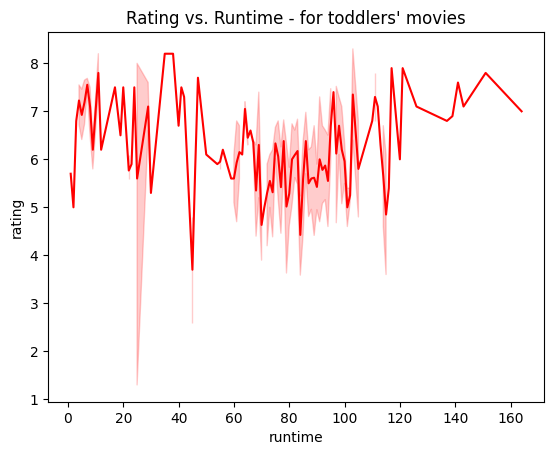

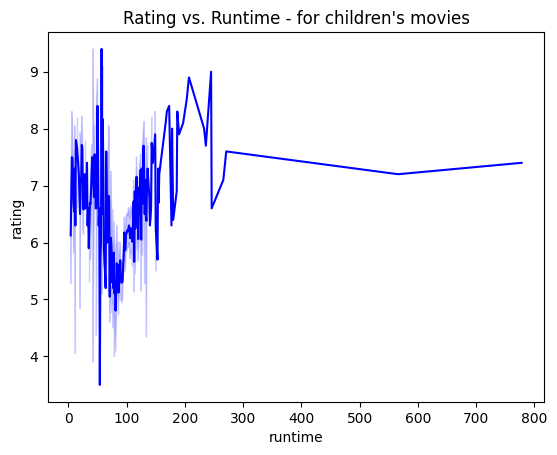

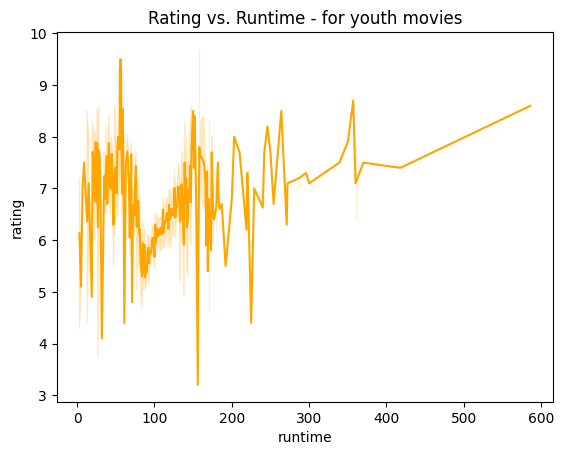

In [27]:
# For toddlers
plt.figure()
sns.lineplot(x='runtime', y='rating', data=movies_for_toddlers, color='red')
plt.title("Rating vs. Runtime - for toddlers' movies")

# For children
plt.figure()
sns.lineplot(x='runtime', y='rating', data=movies_for_children, color='blue')
plt.title("Rating vs. Runtime - for children's movies")

# For youth
plt.figure()
sns.lineplot(x='runtime', y='rating', data=movies_for_youth, color='orange')
plt.title("Rating vs. Runtime - for youth movies")

#### Since we saw that some of the data is not completely normally distributed,
#### we will omit it from the final graph so that we can get a more focused picture of the data.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 1.0, 'Rating vs. Runtime - for youth movies')

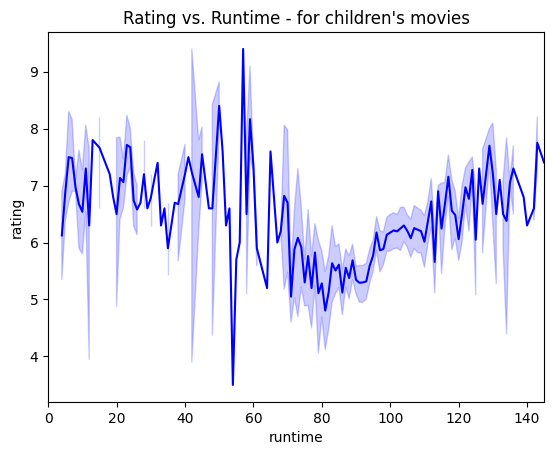

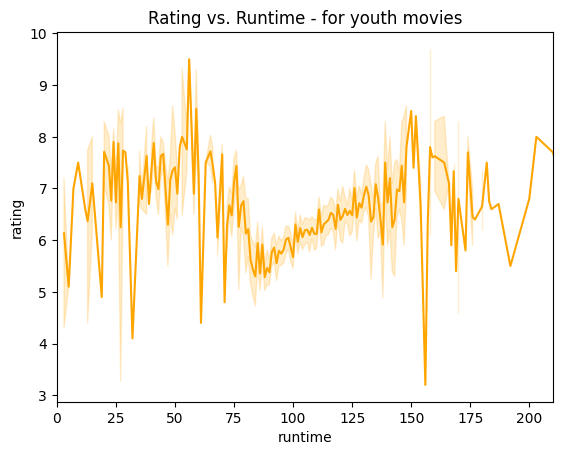

In [28]:
# For children
plt.figure()
sns.lineplot(x='runtime', y='rating', data=movies_for_children, color='blue')
plt.xlim(0, 145)
plt.title("Rating vs. Runtime - for children's movies")

# For youth
plt.figure()
sns.lineplot(x='runtime', y='rating', data=movies_for_youth, color='orange')
plt.xlim(0, 210)
plt.title("Rating vs. Runtime - for youth movies")

#### We see now that our all contens there are not anough DataPoints to reach a conclution.

#### We found that sometimes there is a connection between the length of a film and its rating,
#### but not always necessarily.

#### Let's continue with our next task:
#### Find which ages have the most contents?

There is 318 movies for toddlers, 1912 movies for children, and 3126 movies for youth.


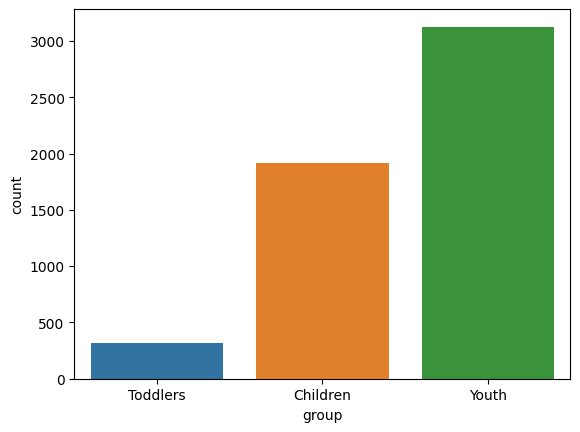

In [29]:
movies_all = pd.concat([
    movies_for_toddlers.assign(group='Toddlers'),
    movies_for_children.assign(group='Children'),
    movies_for_youth.assign(group='Youth')
], ignore_index=True)

sns.countplot(data=movies_all, x='group', order=['Toddlers', 'Children', 'Youth'])

toddlers = movies_for_toddlers.shape[0]
children = movies_for_children.shape[0]
youth = movies_for_youth.shape[0]

print(f"There is {toddlers} movies for toddlers, {children} movies for children, and {youth} movies for youth.")

#### Now, our last question:
#### Do films that have box office revenue have higher ratings?

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


Text(0.5, 1.0, 'Rating vs. Box Plot (Barplot)')

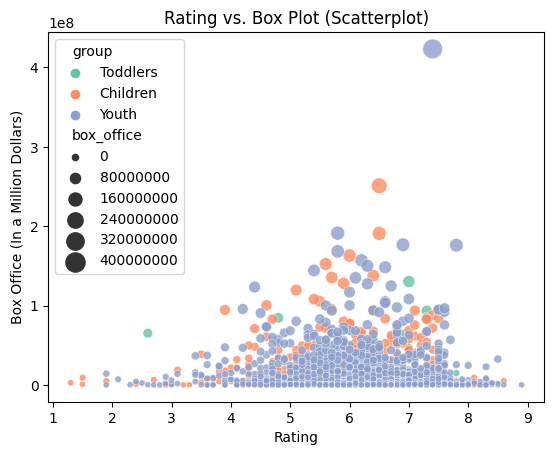

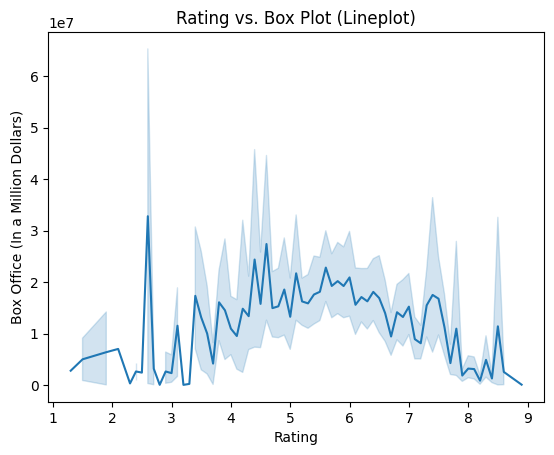

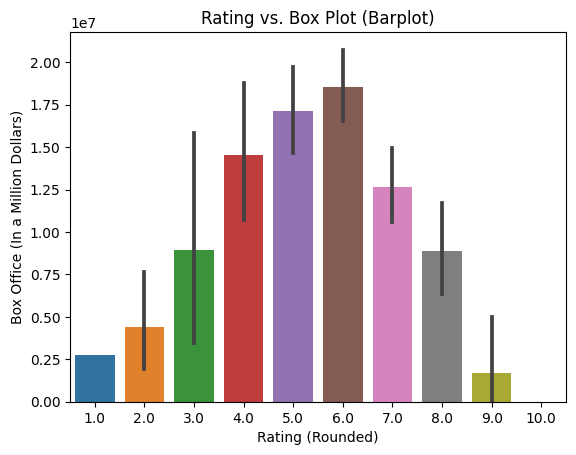

In [30]:
movies_all['box_office'] = movies_all['box_office'].str.replace('$', '', regex=False)
movies_all['box_office'] = movies_all['box_office'].str.replace('M', '', regex=False)
movies_all['box_office'] = pd.to_numeric(movies_all['box_office'], errors='coerce') * 1_000_000

plt.figure()
sns.scatterplot(x='rating', y='box_office', hue='group', palette='Set2', s=20, alpha=0.8,
                size='box_office', sizes=(20, 200), data=movies_all)
plt.ylabel('Box Office (In a Million Dollars)')
plt.xlabel('Rating')
plt.title('Rating vs. Box Plot (Scatterplot)')

plt.figure()
sns.lineplot(x='rating', y='box_office', data=movies_all)
plt.ylabel('Box Office (In a Million Dollars)')
plt.xlabel('Rating')
plt.title('Rating vs. Box Plot (Lineplot)')

movies_all['rating_rounded'] = movies_all['rating'].round(0)
plt.figure()
sns.barplot(x='rating_rounded', y='box_office', data=movies_all)
plt.ylabel('Box Office (In a Million Dollars)')
plt.xlabel('Rating (Rounded)')
plt.title('Rating vs. Box Plot (Barplot)')

#### It seems that a large budget doesn't necessarily affect how well a film is rated,
#### and we found that many films with small budgets receive average to relatively good ratings. 
#### Impressive!

In [31]:
def top_movies(movies2, group_name, n=5):
    movies2 = movies2.copy()
    movies2 = movies2.drop_duplicates(subset='movie')
    movies2['votes_clean_num'] = pd.to_numeric(
        movies2['votes_clean'].astype(str).str.replace(',', ''), errors='coerce'
    )

    movies2['score'] = movies2['rating'] * (movies2['votes_clean_num'] / 1000)
    
    top = movies2.sort_values(by=['score'], ascending=[False]).head(n)
    top['group'] = group_name
    return top[['group', 'movie', 'runtime', 'rating', 'votes_clean',  'genre', 'box_office', 'score']]

top_toddlers = top_movies(movies_for_toddlers, 'Toddlers', 5)
top_children = top_movies(movies_for_children, 'Children', 10)
top_youth = top_movies(movies_for_youth, 'Youth', 10)

top_all = pd.concat([top_toddlers, top_children, top_youth], ignore_index=True)
top_all


,group,movie,runtime,rating,votes_clean,genre,box_office,score
0,Toddlers,Neko no ongaeshi,75,7.1,"60,537.0","Animation, Adventure, Comedy",NaN,429.8127
1,Toddlers,The Lion King 1½,77,6.5,"44,048.0","Animation, Adventure, Comedy",NaN,286.3120
2,Toddlers,Piper,6,8.3,"30,865.0","Animation, Short, Family",NaN,256.1795
3,Toddlers,Bao,8,7.5,"31,912.0","Animation, Short, Drama",NaN,239.3400
4,Toddlers,Presto,5,8.3,"25,213.0","Animation, Short, Comedy",NaN,209.2679
5,Children,It's a Wonderful Life,130,8.6,"476,004.0","Drama, Family, Fantasy",NaN,4093.6344
6,Children,One Punch Man: Wanpanman,24,8.7,"173,681.0","Animation, Action, Comedy",NaN,1511.0247
7,Children,Klaus,96,8.2,"169,352.0","Animation, Adventure, Comedy",NaN,1388.6864
8,Children,One Piece: Wan pîsu,24,8.9,"154,563.0","Animation, Action, Adventure",NaN,1375.6107
9,Children,Luca,95,7.4,"177,815.0","Animation, Adventure, Comedy",NaN,1315.8310


#### We just do some final checks.
#### Let's see what our top-rated content is!

#### Now, Let's go to
### 5) Recommendations

#### So we've reached the recommendations stage.
#### According to the data I've collected, I would recommend that the "Children's Television" director bring the following content:
#### For toddlers; "Piper" and "Bao".
##### Two short films that are 5-7 minutes long that they can watch over and over again, and not too long for them.
#### For children; "Klaus", "Luca", "Turning Red", "What If...?",
##### three recommended films, two from Walt Disney-Pixar, and one from Spain. In addition, a popular Marvel series.
#### For teenagers; "Modern Family", "Attack on Titan", "Loki", "Seinfeld".
##### Four recommended series. Three American live action, one Japanese animation (anime). It is recommended to bring one season of each series first, to see what the reactions are. If you liked it, you can bring additional seasons later.

#### General recommendation for toddlers - light content, not long.
#### General recommendation for children - light, comedic content.
#### General recommendation for youth - varied content, with at least 2 comedies.

#### According to the conclusions I have gathered, there is no direct relationship between the length of the content and the impact of the ratings it received.
#### There is a relative relationship between the amount of revenue a content received and its ratings.
#### There is little content for toddlers, quite a bit of content for children, and a lot of content for youth.

#### 